In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

## 1. Average trip duration change during the week

In [2]:
taxi = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-06.csv')
taxi.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.00,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.00,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.30,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
5,1,2018-06-01 00:09:00,2018-06-01 00:24:01,1,2.00,1,N,161,234,1,11.5,0.5,0.5,2.55,0.0,0.3,15.35
6,1,2018-06-01 00:02:33,2018-06-01 00:13:01,2,1.50,1,N,163,233,1,8.5,0.5,0.5,1.95,0.0,0.3,11.75
7,1,2018-06-01 00:13:23,2018-06-01 00:16:52,1,0.70,1,N,186,246,1,5.0,0.5,0.5,1.85,0.0,0.3,8.15
8,1,2018-06-01 00:24:29,2018-06-01 01:08:43,1,5.70,1,N,230,179,2,22.0,0.5,0.5,0.00,0.0,0.3,23.30
9,2,2018-06-01 00:17:01,2018-06-01 00:23:16,1,0.85,1,N,179,223,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30


In [3]:
taxi.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [4]:
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi.tpep_pickup_datetime)
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi.tpep_dropoff_datetime)

In [5]:
taxi['duration'] = taxi['tpep_dropoff_datetime'] - taxi['tpep_pickup_datetime']
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,00:01:06
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,00:05:00
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,00:15:07
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,00:00:04
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,00:00:04


In [6]:
taxi['week'] = taxi['tpep_dropoff_datetime'].dt.week
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,week
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,00:01:06,22
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,00:05:00,22
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,00:15:07,22
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,00:00:04,22
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,00:00:04,22


In [7]:
taxi['duration'] = taxi['duration'].dt.seconds
group = taxi['duration'].groupby(taxi['week'])
group.describe()

,count,mean,std,min,25%,50%,75%,max
week,,,,,,,,
1,32.0,3765.875000,14907.268292,0.0,571.75,840.0,1659.50,85308.0
2,4.0,7632.250000,13397.923008,586.0,873.25,1109.0,7868.00,27725.0
5,4.0,779.750000,677.580192,376.0,382.00,478.0,875.75,1787.0
8,6.0,380.500000,209.907361,196.0,231.75,323.5,443.00,756.0
11,4.0,570.750000,497.677523,261.0,316.50,354.0,608.25,1314.0
14,4.0,522.500000,136.924553,349.0,452.50,537.5,607.50,666.0
17,1.0,183.000000,NaN,183.0,183.00,183.0,183.00,183.0
22,892074.0,985.927458,3358.455373,0.0,391.00,663.0,1102.00,86399.0
23,2071723.0,1052.096169,3781.825231,0.0,405.00,685.0,1130.00,86398.0


## Above we can see that we have extra data which are not related to our month or year. It means we can drop these extra data.

In [8]:
weeks = np.arange(22, 27)
taxi = taxi[taxi['week'].isin(weeks)]

In [9]:
group = taxi['duration'].groupby(taxi['week'])
avg = group.mean()/60
print(avg)

week
22    16.432124
23    17.534936
24    17.194713
25    17.966442
26    18.472344
Name: duration, dtype: float64


Text(0, 0.5, 'Minutes')

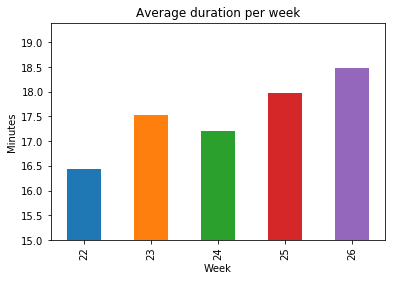

In [10]:
avg.plot.bar()
plt.ylim(15)
plt.title('Average duration per week')
plt.xlabel('Week')
plt.ylabel('Minutes')

## Above you can see average duration of trips in minutes per week in June.

## 2. The highest average trip fare (between different boroughs)

In [11]:
bor = taxi[['PULocationID', 'DOLocationID', 'fare_amount']].assign(Not_equal=taxi.PULocationID != taxi.DOLocationID)
bor.shape

(8713673, 4)

In [12]:
bor = bor[bor.Not_equal != False]
bor.shape

(8151004, 4)

In [13]:
bor.head()

,PULocationID,DOLocationID,fare_amount,Not_equal
1,230,161,5.5,True
2,100,263,13.0,True
5,161,234,11.5,True
6,163,233,8.5,True
7,186,246,5.0,True


Text(0, 0.5, 'Fare amount')

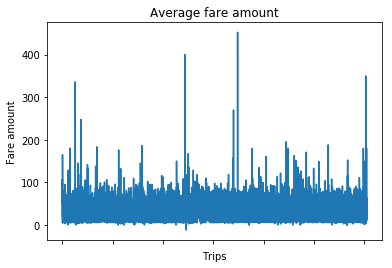

In [14]:
means = bor.groupby(['PULocationID', 'DOLocationID'])['fare_amount'].mean()
means.plot()
plt.title('Average fare amount')
plt.xlabel('Trips')
plt.ylabel('Fare amount')

In [15]:
max_val = np.max(means.values)
max_val

452.5

In [16]:
print(*means[means  == max_val].index.tolist()) 

(159, 240)


## (159, 240) results in the highest average trip fare which equals to 452.5

## 3. Drivers are unsatisfied with fares from Manhattan during evening peak hours on working days. Management team wants to introduce subsidies in such hours. Identify which hours are most likely the problem ones and estimate possible value of X considering monthly budget of $6mln.

In [17]:
zone = pd.read_csv('taxi _zone_lookup.csv')
zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [18]:
zone = zone[['LocationID','Borough', 'service_zone']]
zone = zone[zone.Borough == 'Manhattan'] 
zone = zone[zone.service_zone == 'Yellow Zone']
locations = zone.LocationID.values
locations

array([  4,  12,  13,  24,  43,  45,  48,  50,  68,  79,  87,  88,  90,
       100, 103, 104, 105, 107, 113, 114, 125, 137, 140, 141, 142, 143,
       144, 148, 151, 158, 161, 162, 163, 164, 170, 186, 194, 209, 211,
       224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 246, 249,
       261, 262, 263], dtype=int64)

In [19]:
rush = taxi[(taxi['PULocationID'].isin(locations) | taxi['DOLocationID'].isin(locations))]
rush = taxi[taxi['extra'] == 0.5]
rush.reset_index().head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,week
0,0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,66,22
1,1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,300,22
2,2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,907,22
3,3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,4,22
4,4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,4,22


In [20]:
days = np.arange(5)
rush = rush[rush['tpep_pickup_datetime'].dt.weekday.isin(days)]

In [21]:
rush = rush.assign(pickup_hour=pd.Series(rush['tpep_pickup_datetime'].dt.hour))
rush = rush.assign(dropoff_hour=pd.Series(rush['tpep_dropoff_datetime'].dt.hour))

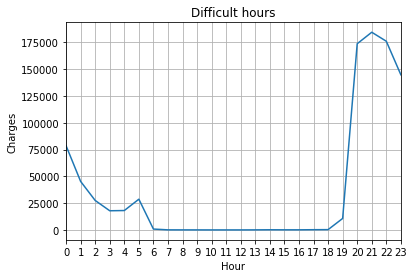

In [22]:
rush.groupby(['pickup_hour'])['extra'].sum().plot()
plt.title('Difficult hours')
plt.xlabel('Hour')
plt.ylabel('Сharges')
plt.xlim(0, 23)
plt.xticks(np.arange(0, 24))
plt.grid()

In [23]:
money = rush.groupby(['pickup_hour'])['extra'].sum()
X_per_month = money[19:23].sum()
X_per_ride = 6000000 / (X_per_month / 0.5)
print('{0}$'.format(round(X_per_ride, 3)))

5.511$


## Evening peak hours are between 19 p.m. and 22 p.m.
## X_per_ride = 5.511 dollars